# Investments all Calculations

## Module 1

### Project Net Present Value

* A project requires an upfront investment of $1 millionand yields cash flows as show below. Assume the annual discount rate, r, is 10\%

1.  What is the present value of the cash flows?
2.  What is the net present value of the project?
3.  How do the results change if r = 18%?

In [45]:
library(data.table)
suppressMessages(library(tidyverse))
projectNPVTable <- data.table(`Time Cash Flow is Received (in years)` = c(1:3), `Cash Flow (in $)` = formattable::accounting(c(400000,450000,380000)))
projectNPVTable

Time Cash Flow is Received (in years),Cash Flow (in $)
<int>,<formttbl>
1,"400,000.00"
2,"450,000.00"
3,"380,000.00"


1. Present Value of the Cash flows:
* Discount each cash flow using discount formula: $\frac{C_{t}}{(1+r)^{t}}$
    - ex: PV of cash flow in year 3 = $\frac{380000}{(1+.10)^{3}}$

In [6]:
discountToPV <- function(discountRate, time, cashflow){
    pv = cashflow / ((1+discountRate)^time)
    pv
}
projectNPVTable[,
    `PV of Cashflow (in $)` := sapply(1:(nrow(projectNPVTable)), 
        FUN = function(x) discountToPV(discountRate = .10, 
                                    time = projectNPVTable[x,]$`Time Cash Flow is Received (in years)`, 
                                    cashflow = projectNPVTable[x,]$`Cash Flow (in $)`))]

projectNPVTable

Time Cash Flow is Received (in years),Cash Flow (in $),PV of Cashflow (in $)
<int>,<formttbl>,<dbl>
1,"400,000.00",363636.4
2,"450,000.00",371900.8
3,"380,000.00",285499.6


2. Net Present Value of Cash Flow
* Sum the discounted cash flows from project and subtract the upfront investment


In [7]:
npv = sum(projectNPVTable$`PV of Cashflow (in $)`) - 1000000
formattable::accounting(npv)

[1] 21,036.81

3. Using a discount rate of 18% instead of 10%
* Replace 10% with 18% in discount formula $\frac{C_{t}}{(1+r)^{t}}$
    - ex: PV of cash flow in year 3 = $\frac{380000}{(1+.18)^{3}}$

In [8]:
projectNPVTable[,
    `PV of Cashflow with r = 18% (in $)` := sapply(1:(nrow(projectNPVTable)), 
        FUN = function(x) discountToPV(discountRate = .18, 
                                    time = projectNPVTable[x,]$`Time Cash Flow is Received (in years)`, 
                                    cashflow = projectNPVTable[x,]$`Cash Flow (in $)`))]

projectNPVTable 
npv = sum(projectNPVTable$`PV of Cashflow with r = 18% (in $)`) - 1000000
formattable::accounting(npv)                                   

Time Cash Flow is Received (in years),Cash Flow (in $),PV of Cashflow (in $),PV of Cashflow with r = 18% (in $)
<int>,<formttbl>,<dbl>,<dbl>
1,"400,000.00",363636.4,338983.1
2,"450,000.00",371900.8,323183.0
3,"380,000.00",285499.6,231279.7


[1] (106,554.22)

* Negatative NPV when discount rate is 18%, reject project

### Price of a Bond

* What is the price of a bond that pays a fixed annual coupon, C, of 5% and has a maturity, T, of 4 years?
    - Assume interest rate, r, is 6%
    - Assume face value of $100

* Price of a bond given by formula:
    - $P_{B} = \sum^{T}_{t=1} \frac{C}{(1+r)^{t}} + \frac{Par Value}{(1+r)^{T}}$

* $P_{B} = \sum^{T = 4}_{t=1} \frac{(100*0.05)}{(1+0.06)^{t}} + \frac{(100)}{(1+0.06)^{T}}$
* $P_{B} = $   

In [9]:
bondPrice <- function(faceValue = 100, couponRate, discountRate, timeToMaturity){
    coupon = faceValue * couponRate
    discountedCashFlows <- sum(sapply(1:timeToMaturity, FUN = function(x) (coupon / ((1+discountRate)^x)) ))
    discountedFaceValue <- faceValue / ((1+discountRate)^timeToMaturity)
    price = discountedCashFlows + discountedFaceValue
    price
}
bondPrice(faceValue = 100, couponRate = .05, discountRate = .06, timeToMaturity = 4)

[1] 96.53489

### Holding Period Return
* Using bond in the previous example
* Assume bond was purchased one year ago at a price of $95
* The bond is sold now after recieving just one coupon payment
* Holding Period Returns = $\frac{P_{1} - P_{0} + C_{1}}{P_{0}}$
    - For Example: $\frac{96.53 - 95 + 5}{95} = 0.688 = 6.88\%$

### Pricing Under Uncertainty
* Prices of a security may change under different scenarios
* Useful to use a table containing the probabilities and prices (or HPRs) for all scenarios
    - would reflect the _probability distribution of price (or HPR)_

#### Bond Price Under Uncertainty


In [10]:
uncertaintyTable <- data.table(`Economic State` = c("Boom","Normal Growth", "Recession"),
                                `Probability` = c(.30,.50,.20),
                                `Price in $` = c(98,100,103))
uncertaintyTable                                

Economic State,Probability,Price in $
<chr>,<dbl>,<dbl>
Boom,0.3,98
Normal Growth,0.5,100
Recession,0.2,103


## Module 2

### Uncertain Payoffs

* Consider a risky portfolio. The end-of-year cash flow from the portfolio will either be \$5,000 or \$15,000; with equal probabilities (50% each). The risk-free T-Bill rate is 5.5\% annually
* You require a return of 7\% higher than the benchmark risk-free rate
    - What is the expected portfolio payoff at year end?
    - What is your total required rate of return?
    - What is the present value of the portfolio?

* Expected Portfolio payoff at years End:
    - Take the probability weigheted returns and sum
    - $(5,000 * .5) + (15,000 * .5) = 10,000$     


* What is the total required rate of return?
    - Risk-free rate plus required return
    - $5.5\% + 7\% = 12.5\%$

* What is the PV of the portfolio?
    - Discount Payoff at year end by one year using required rate of return as discount rate
    - $\frac{10,000}{(1+.125)^1} = 8,888$        

### Drawing Indifference Curves

* Indifference Curves are iso-utility curves. Any one curve shows **all the combinations of expected return and volatility that give the same constant utility value**
* Start with the equation for the investor's utility, with a specific utility value, U
* Select a specific expected value and solve for the volatility value that satisfies the equation
    - Then choose another expected return value and find the volatility that solves that equation
    - Plot all the E(r) volatility pairs to plot the indifference curve for that utility value, U

* Example: Drawing Indifference Curve
    - $U = E(r) - \frac{1}{2}A\sigma^{2}$
    - Assume A = 5
    - Target an indifference curve that corresponds to a Utility Value of 0.1
        - $0.1 = E(r) - 2.5\sigma^{2}$

    - Solve for Volatility for a variety of different Expected Returns and Plot E(r) against Volatility
            



Warning message:
“Removed 10 row(s) containing missing values (geom_path).”


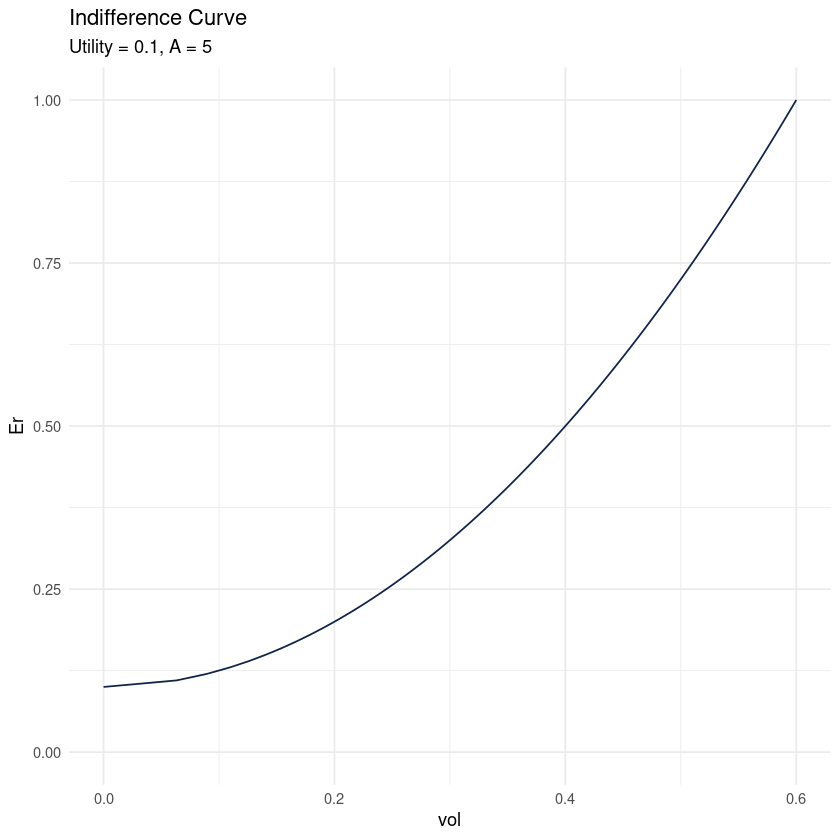

In [23]:
indifferenceCurve <- function(A, Er, U){
    sd = (-2*U + 2*Er)/A
    vol = sqrt(sd)
    vol
}

indifferenceCurveTable <- data.table(Er = seq(0,1,by = .01))
suppressWarnings(indifferenceCurveTable[,vol := sapply(Er, FUN = function(x) indifferenceCurve(A = 5, U = .1, Er = x))])

suppressWarnings(ggplot(indifferenceCurveTable) + aes(y = Er, x = vol) + geom_line(size = 0.5, colour = "#112446") + labs( title = "Indifference Curve", subtitle = "Utility = 0.1, A = 5" ) + theme_minimal())



### Plot the Risky Opportunity Set (with Two Risky Assets)

* With two risky assets, we know the expected portfolio return and volatility are given by these two equations
    - $E(r_{p}) = w_{D}*E(r_{D}) + w_{E}*E(r_{E})$
    - $\sigma^{2}_{p} = w^{2}_{D}\sigma{2}_{D} + w^{2}_{E}\sigma^{2}_{E} + 2w_{D}w_{E}Cov(r_{D}r_{E})$

* We also know that
    - $ \rho_{D,E} = \frac{Cov(r_{D}r_{E})}{\sigma_{D}\sigma_{E}} $
    - $ Cov(r_{D},r_{E}) = \rho_{D,E}\sigma_{D}\sigma_{E} $

* Example: Risky Opportunity Set Assumed Values
    - $E(r_{D}) = 8\%$
    - $E(r_{E}) = 18\%$
    - $\sigma_{D} = 14\%$
    - $\sigma_{E} = 25\%$
    - $\rho_{D,E} = 0.3$
    - Calculate Covariance between the Stock Fund, E, and Bond Fund, D
        - $ Cov(r_{D},r_{E}) = \rho_{D,E}\sigma_{D}\sigma_{E} $
        - = $0.3 * 0.14 * 0.25$
        - = $0.0105$
    
    - Calculate Expected Returns and volatilities of the portfolio for various weight combinations $[w_{D},w_{E}]$
        


In [40]:
riskyOpportunitySetTable <- data.table(wD = seq(0,1,by = .01))
riskyOpportunitySetTable[,wE := 1-wD]

portfolioExpectedReturns <- function(wD,ErD,ErE){
    wE = 1-wD
    ErP = ( wD * ErD ) + ( wE * ErE )
    ErP
}

portfolioVariance <- function(wD,sigmaD,sigmaE,covDE){
    wE = 1 - wD
    sd = ( (wD^2) * (sigmaD^2) ) + ( (wE^2) * (sigmaE^2) ) + ( 2 * wD * wE * covDE)
    vol = sqrt(sd)
    vol
}

riskyOpportunitySetTable[,portfolioEr := sapply(wD, FUN = function(x) portfolioExpectedReturns(wD = x, ErD = .08, ErE = .18) )]
riskyOpportunitySetTable[,portfolioVol := sapply(wD, FUN = function(x) portfolioVariance(wD = x, sigmaD = .14, sigmaE = .25, covDE = .0105) )]
head(riskyOpportunitySetTable,11)
tail(riskyOpportunitySetTable,11)


wD,wE,portfolioEr,portfolioVol
<dbl>,<dbl>,<dbl>,<dbl>
0.00,1.00,0.180,0.2500000
0.01,0.99,0.179,0.2479236
0.02,0.98,0.178,0.2458545
0.03,0.97,0.177,0.2437929
0.04,0.96,0.176,0.2417390
0.05,0.95,0.175,0.2396930
0.06,0.94,0.174,0.2376551
0.07,0.93,0.173,0.2356255
0.08,0.92,0.172,0.2336045


wD,wE,portfolioEr,portfolioVol
<dbl>,<dbl>,<dbl>,<dbl>
0.90,0.10,0.090,0.1356134
0.91,0.09,0.089,0.1358562
0.92,0.08,0.088,0.1361435
0.93,0.07,0.087,0.1364749
0.94,0.06,0.086,0.1368501
0.95,0.05,0.085,0.1372689
0.96,0.04,0.084,0.1377308
0.97,0.03,0.083,0.1382353
0.98,0.02,0.082,0.1387820


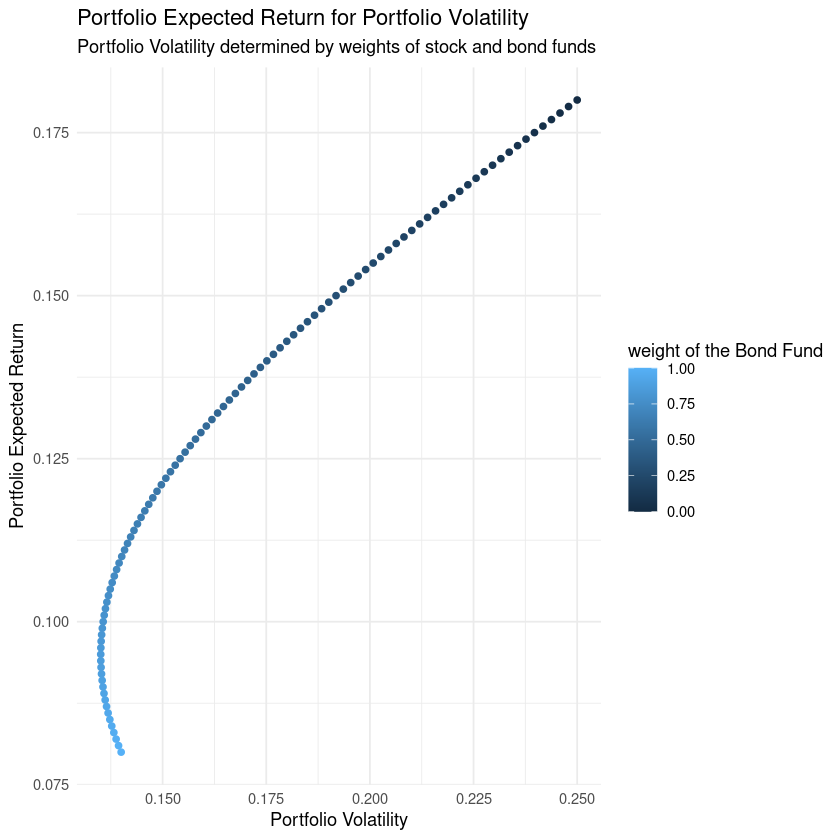

In [44]:
ggplot(riskyOpportunitySetTable) + aes(x = portfolioVol, y = portfolioEr, colour = wD) + geom_point(shape = "circle", size = 1.5) + scale_color_gradient() + labs( x = "Portfolio Volatility", y = "Portfolio Expected Return", title = "Portfolio Expected Return for Portfolio Volatility", subtitle = "Portfolio Volatility determined by weights of stock and bond funds", color = "weight of the Bond Fund" ) + theme_minimal()

## Module 3

### Perpetuities
* Perpetuity is an _infinite stream_ of equal cash flows, received or paid at equal time intervals
* Perpetuities are perpetual, their cash flows never end; they continue to infinity
* The Classic example of an infinite cash flow stream is the dividend payment pattern from stock ownership

* The present value of a constant and infinite cash flow stream is given by the formula:
    - $ PV(perpetuity) = \frac{D}{r} $
    - Where D stands for annual cash flow
    - r is the discount rate

* The present value of an infinite cash flow, C, stream growing at the rate g is:
    - $ PV(growing perpetuity) = \frac{D}{r-g} $
    - where g is the growth rate

#### Perpetuity Example
* A stock is expected to pay an infinite stream of \$1.50 dividends. The discount rate reflecting the risk of the cash flows is 10\%
* What is the present value (or fair value) of this infinite cash flow stream?
    - $P_{0} = PV = \frac{1.50}{.10} = \$15 $
* This suggests the fair value of the stock is \$15

* What is the fair value if the dividend grows after a year by 2\% annually thereafter?
    - $P_{0} = PV = \frac{1.50}{.10 - .02} = \$18.75 $

#### Perpetuity Example 2
* Suppose the market price of a stock is $42. THe firm pays out all of its earnings every year as dividends, and expects that the amount to remain fixed at $3 annually. What is the implied discount rate applied by the market?
    - $ \$42 = \frac{3}{r} $
    - $ r = 7.14\% $

### CAPM Example
* Suppose the following:
    - XYZ stock has a beta of 1.2
    - ABC stock has a beta of 0.9
    - Risk-free rate is 6\%
    - Expected market return is 9.3\%
* What is the fair expected return for each stock according to CAPM?

* $ E(r_{i}) = r_{f} + \beta_{i}[E(r_{M} - r_{f})] $

    - for stock XYZ: $E(r_{i}) = .06 + ( 1.2 * (.093 - .06) ) = 9.96\%$
    - for stock ABC: $E(r_{i}) = .06 + ( 0.9 * (.093 - .06) ) = 8.97\%$
             
### The Security Market Line
* Security Market Line (SML) is the relationship between expected return and beta
* Example:
    - Assume the risk-free rate is 6\%
    - Assume the expected market return is 9.3\%
    - What is the SML?    

beta,Er
<dbl>,<dbl>
0.00,0.06000
0.01,0.06033
0.02,0.06066
0.03,0.06099
0.04,0.06132
0.05,0.06165
0.06,0.06198
0.07,0.06231
0.08,0.06264


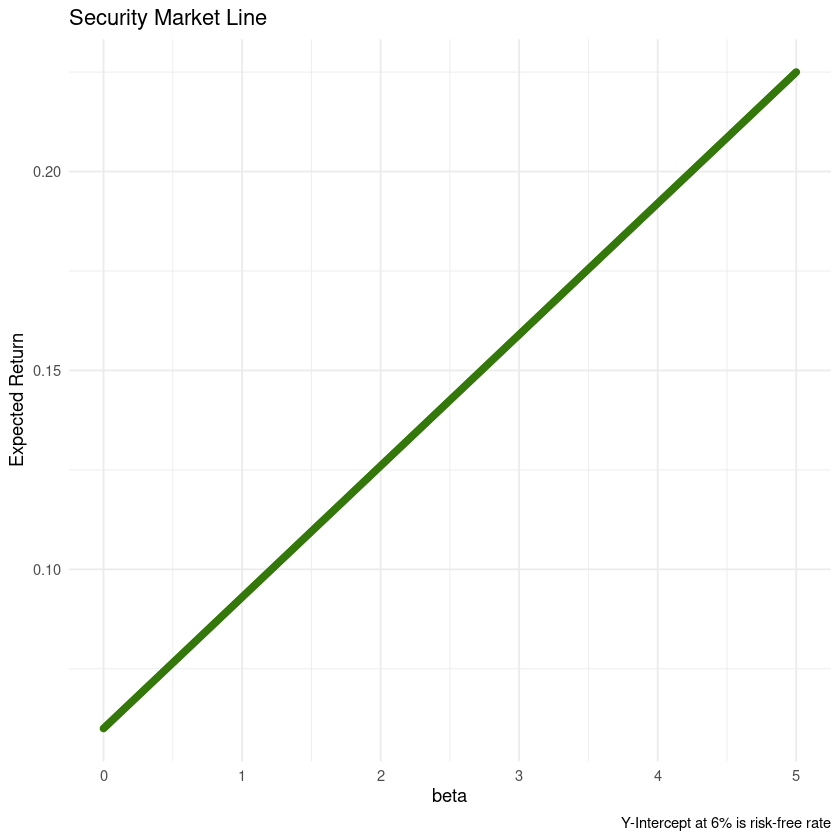

In [55]:
securityMarketLine <- data.table(beta = seq(0,5,by = .01))
securityMarketLine[, Er := (.06 + (beta * (.093 - .06))) ]

head(securityMarketLine,10)
ggplot(securityMarketLine) + aes(x = beta, y = Er) + geom_point(shape = "circle", size = 1.5, colour = "#34780B") + labs( x = "beta", y = "Expected Return", title = "Security Market Line", caption = "Y-Intercept at 6% is risk-free rate" ) + theme_minimal()

### Dividend Discount Model

* ACME Inc. currently pays a $2 annual dividend which is expected to grow at 7% annually for the next three years and 2% thereafter
* Expected dividends for the next 5 years:


In [83]:
divDiscountModelTable <- data.table(Time = 0:5)
divDiscountModelTable[1:4,dividendGrowth := (1.07^Time)]
divDiscountModelTable[5:6,dividendGrowth := (1.02^(Time-3))]
divDiscountModelTable[,dividendGrowthSpot := (dividendGrowth - 1) * 2]
divDiscountModelTable[5:6,dividendGrowthSpot := dividendGrowthSpot + divDiscountModelTable[4,]$dividendGrowthSpot]
divDiscountModelTable[,dividend := dividendGrowthSpot + 2]


divDiscountModelTable

Time,dividendGrowth,dividendGrowthSpot,dividend
<int>,<dbl>,<dbl>,<dbl>
0,1.000000,0.000000,2.000000
1,1.070000,0.140000,2.140000
2,1.144900,0.289800,2.289800
3,1.225043,0.450086,2.450086
4,1.020000,0.490086,2.490086
5,1.040400,0.530886,2.530886


### Free Cash Flow Valuation Example

* Excalibur LLC's cash from operations before interest and taxes is \$2 million, and it expects this will grow at 5\% forever. To make this happen going forward the firm must invest an amount equal to 20\% of pre-tax cash flow each year. Tax rate is 35\%. Depreciation was \$200,000 in the year just ended and is expected to grow at the same rate as the operating cash flow. The appropiate market capitalization rate for the unlevereged cash flow is 12\% per year, and the firm currently has sebt of \$4 million outstanding. Use the free cash flow approach to value the firm's equity

|One Year from Now | Cash flow |
|----------|-----------|
|Before-tax cash flow from operations ($2 million plus 5\%) | \$2,100,000
| Depreciation | 210,000 |
| Taxable Income | 1,890,000 |
| Taxes (@35%) | 661,500 |
| After-tax unleveraged income | 1,228,500 |
| Free Cash Flow after Depreciation (After-tax unleveraged income + depreciation) | 1,420,000 |
| New Investment (20\% of cash flow from operations) | 420,000 |
| Free-cash flow (After-tax cash flow from operations - new investments) | 1,018,500 |


* The value of the enterprise:

    - $V_{o} = \frac{C_{1}}{k-g} = \frac{1,018,500}{0.12 - 0.05} = \$14,550,000$
    - Since the value of debt is \$4 million, the value of equity = \$10,550,000
    



## Module 4

### Risk Premiums

* Solve for the two factor risk premiums
* Suppose there are two independent economic factors, F1 and F2. The risk-free rate is 3%. All stocks have independent firm-specific components. Portfolio C and D are both well diversified and fairly priced, with these inputs:

| Portfolio | Beta on $F_{1}$ | Beta on $F_{2}$ | Expected Return |
|------------|-------------|-------------|-------------|
| C | 2 | -1.6 | 24% |
| D | 1 | 2.4 | 19% |

* With two risky assets, we know the expected portfolio return are given by the following equations based on multi-factor model:

    - $.24 = .03 + 2(E(r_{1}) - r_{f}) - 1.6(E(r_{2}) - r_{f})$
    - $.19 = .03 + 1(E(r_{1}) - r_{f}) + 2.4(E(r_{2}) - r_{f})$

